In [1]:
import pandas as pd
import altair as alt

raw_bechdel_url = (r"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-09/raw_bechdel.csv")
movies_url = (r"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-09/movies.csv")
age_url = (r'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-14/age_gaps.csv')

raw_bechdel_csv = pd.read_csv(raw_bechdel_url)
movies_csv = pd.read_csv(movies_url)
age_csv = pd.read_csv(age_url)

age_csv.release_year = age_csv.release_year.astype(str)
age_csv.rename({'movie_name' : "title"}, axis = "columns", inplace = True)

In [2]:
# Assuming there's a common column like 'movie_id' to link the datasets
# Merge the datasets
merge_df = movies_csv.merge(raw_bechdel_csv, how = "inner", on = "title")
merge_df = merge_df.merge(age_csv, how = "inner", on = "title")

merge_df["revenue"] = merge_df["domgross"] + merge_df["intgross"] - merge_df['budget']

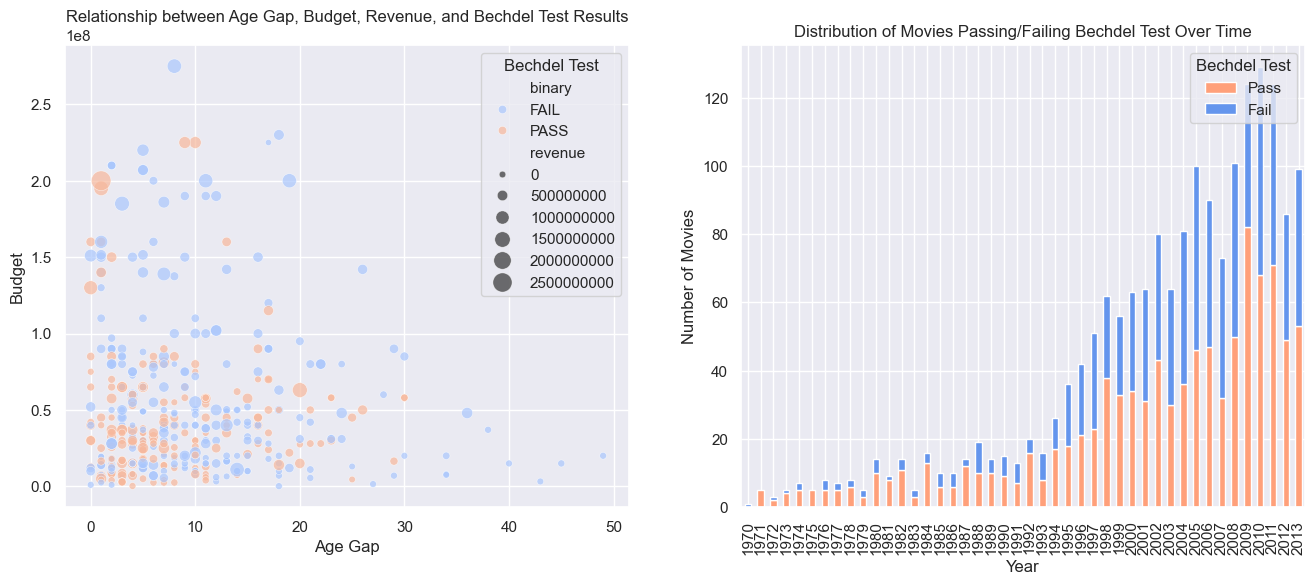

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))  # Create a 1x2 grid of subplots

# First subplot: Scatter plot
sns.set()
sns.scatterplot(data=merge_df, x='age_difference', y='budget', size='revenue', hue='binary',
                palette="coolwarm", sizes=(20, 200), alpha=0.7, ax=axes[0])
axes[0].set_xlabel('Age Gap')
axes[0].set_ylabel('Budget')
axes[0].set_title('Relationship between Age Gap, Budget, Revenue, and Bechdel Test Results')
axes[0].legend(title='Bechdel Test', loc='upper right')

# Second subplot: Stacked bar chart
colors = ['#FFA07A', '#6495ED']  # Colors for 'pass' and 'fail' categories
grouped_data.plot(kind='bar', stacked=True, color=colors, ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Distribution of Movies Passing/Failing Bechdel Test Over Time')
axes[1].legend(title='Bechdel Test', labels=['Pass', 'Fail'], loc='upper right')

# Save the entire figure as a vector graphic (e.g., SVG)
plt.savefig('combined_plots.svg', format='svg')

plt.show()